# Compare parameters

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader.ImageLoader import ImageLoader
from visualizer.image_visualization import print_grayscale, print_rgb
from denoiser.Denoiser import ImageDenoiser
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
def mean_square_error(original_image, reconstructed_image):
    return np.sqrt((original_image - reconstructed_image)**2).mean(axis=None)

In [23]:
def find_best_param(original_image, graph_image, noisy_image, Weight_test_list, Data_fitting_type_list = ["L1", "L2"]):
    best_error = mean_square_error(loader.grayscale(), loader.noisy_image())
    Error_result_list = {}
    Best_energy_history = []
    Best_steps = []
    best_param = ()
    best_reconstructed_image = np.copy(loader.noisy_image())
    for data_fitting_type in Data_fitting_type_list:
        Error_result_list[data_fitting_type] = []
        for regularization_weight in tqdm(Weight_test_list):
            denoiser = ImageDenoiser(graph_image, noisy_image, 
                                    data_fitting_type=data_fitting_type, regularization_weight=regularization_weight)
            Energy_history, Steps = denoiser.alpha_beta_swap(max_iter=3000, verbose=False)
            error = mean_square_error(original_image, denoiser.reconstructed_image)
            Error_result_list[data_fitting_type].append((regularization_weight, error))
            if error < best_error:
                best_error = error
                best_param = (data_fitting_type, regularization_weight)
                Best_energy_history = Energy_history
                Best_steps = Steps     
                best_reconstructed_image = np.copy(denoiser.reconstructed_image)       
    return Error_result_list, Best_energy_history, Best_steps, best_param, best_reconstructed_image, best_error


# Cameraman

## S&P

The graph had not been built before. Wait until its created...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

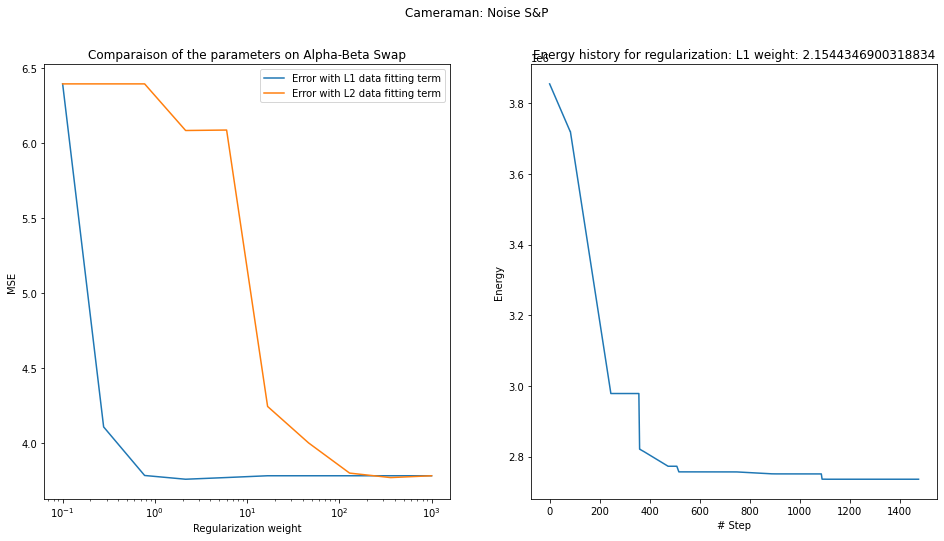

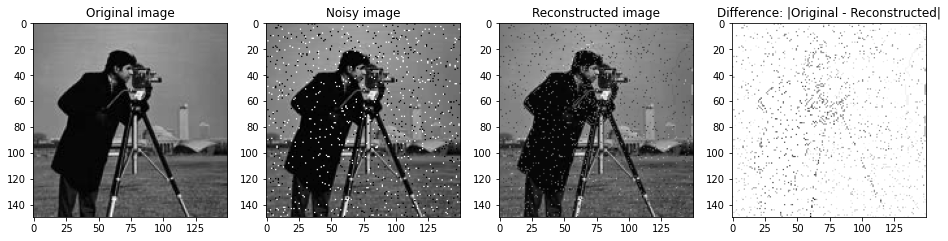

Best error: 3.7617333333333334


In [5]:
loader = ImageLoader("cameraman.jpg", noise="S&P", rescale_factor=None)
cameraman = np.copy(loader.grayscale())
cameraman_sp = np.copy(loader.noisy_image())
graph = loader.graph()

Error_result_list_c_sp, Best_energy_history_c_sp, Best_steps_c_sp, best_param_c_sp, cameraman_sp_rec, best_error_c_sp = find_best_param(loader.grayscale(), 
                                                                                    graph, 
                                                                                    loader.noisy_image(),
                                                                                    Weight_test_list = np.logspace(-1,3,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
f.suptitle("Cameraman: Noise S&P")
ax1.plot(*zip(*Error_result_list_c_sp["L1"]), label="Error with L1 data fitting term")
ax1.plot(*zip(*Error_result_list_c_sp["L2"]), label="Error with L2 data fitting term")
ax1.legend()
ax1.set_xlabel("Regularization weight")
ax1.set_xscale("log")
ax1.set_ylabel("MSE")
ax1.set_title("Comparaison of the parameters on Alpha-Beta Swap")

ax2.plot(Best_steps_c_sp, Best_energy_history_c_sp)
ax2.set_xlabel("# Step")
ax2.set_ylabel("Energy")
ax2.set_title(f"Energy history for regularization: {best_param_c_sp[0]} weight: {best_param_c_sp[1]}")
plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
ax1.imshow(cameraman, cmap='gray')
ax1.set_title("Original image")
ax2.imshow(cameraman_sp, cmap='gray')
ax2.set_title("Noisy image")
ax3.imshow(cameraman_sp_rec, cmap='gray')
ax3.set_title("Reconstructed image")
ax4.imshow(np.abs(cameraman - cameraman_sp_rec), cmap='gray_r')
ax4.set_title("Difference: |Original - Reconstructed|")
plt.show()
print(f"Best error: {best_error_c_sp}")
print(f"Error or the noisy image: {mean_square_error(cameraman, cameramen_sp)}")

In [16]:
print(f"Error or the noisy image: {mean_square_error(cameraman, cameraman_sp)}")

Error or the noisy image: 6.395511111111111


## Gaussian

The graph had not been built before. Wait until its created...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

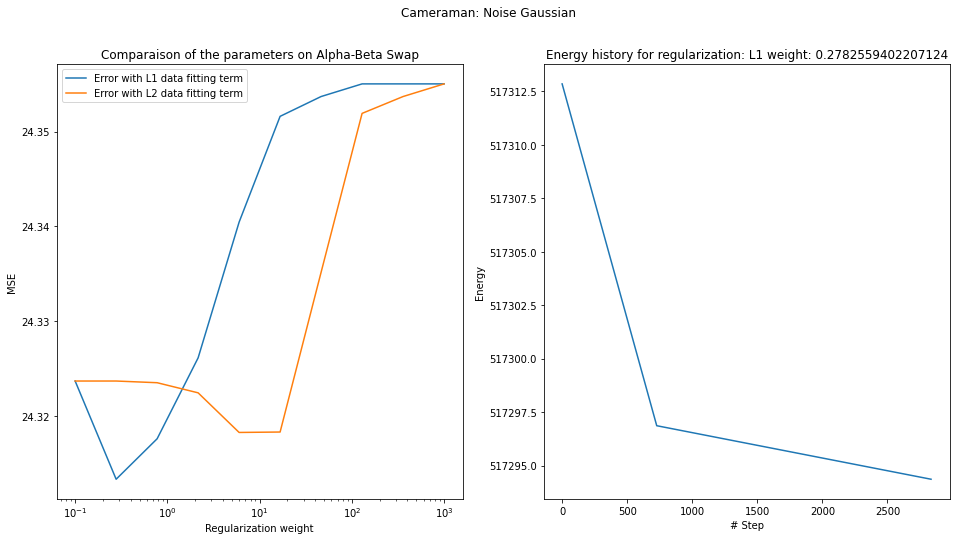

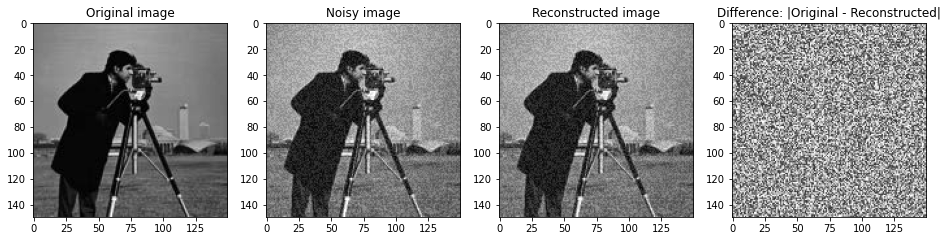

Best error: 24.313333333333333


In [24]:
loader = ImageLoader("cameraman.jpg", noise="gaussian", rescale_factor=None)
cameraman = np.copy(loader.grayscale())
cameraman_gaussian = np.copy(loader.noisy_image())
graph = loader.graph()

Error_result_list_c_g, Best_energy_history_c_g, Best_steps_c_g, best_param_c_g, cameraman_gaussian_rec, best_error_c_g = find_best_param(loader.grayscale(), 
                                                                                    graph, 
                                                                                    loader.noisy_image(),
                                                                                    Weight_test_list = np.logspace(-1,3,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
f.suptitle("Cameraman: Noise Gaussian")
ax1.plot(*zip(*Error_result_list_c_g["L1"]), label="Error with L1 data fitting term")
ax1.plot(*zip(*Error_result_list_c_g["L2"]), label="Error with L2 data fitting term")
ax1.legend()
ax1.set_xlabel("Regularization weight")
ax1.set_xscale("log")
ax1.set_ylabel("MSE")
ax1.set_title("Comparaison of the parameters on Alpha-Beta Swap")

ax2.plot(Best_steps_c_g, Best_energy_history_c_g)
ax2.set_xlabel("# Step")
ax2.set_ylabel("Energy")
ax2.set_title(f"Energy history for regularization: {best_param_c_g[0]} weight: {best_param_c_g[1]}")
plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
ax1.imshow(cameraman, cmap='gray')
ax1.set_title("Original image")
ax2.imshow(cameraman_gaussian, cmap='gray')
ax2.set_title("Noisy image")
ax3.imshow(cameraman_gaussian_rec, cmap='gray')
ax3.set_title("Reconstructed image")
ax4.imshow(np.abs(cameraman - cameraman_gaussian_rec), cmap='gray_r')
ax4.set_title("Difference: |Original - Reconstructed|")
plt.show()
print(f"Best error: {best_error_c_g}")

In [25]:
print(f"Error or the noisy image: {mean_square_error(cameraman, cameraman_gaussian)}")

Error or the noisy image: 24.32368888888889


# Lenna

## S&P

The graph had not been built before. Wait until its created...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

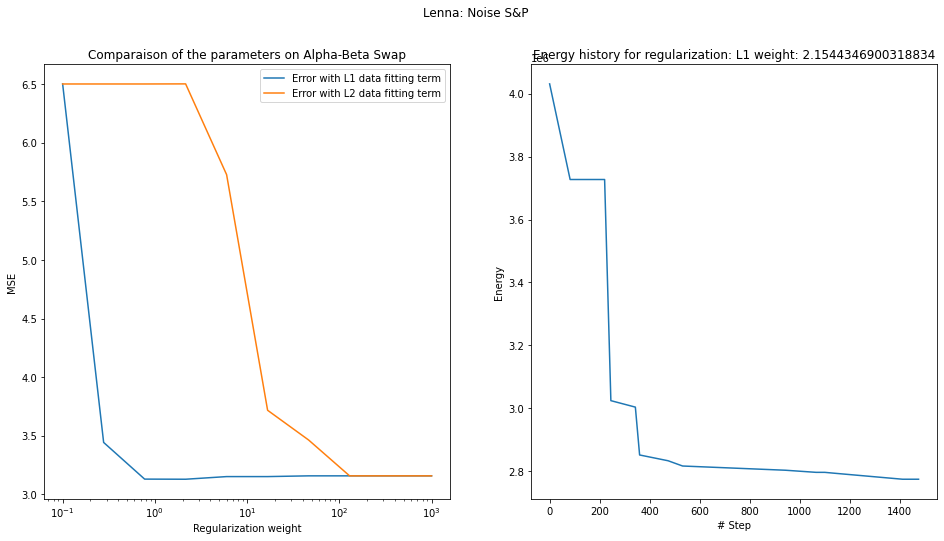

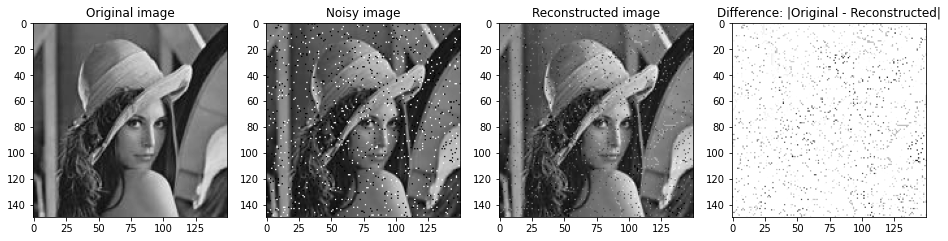

Best error: 3.129111111111111


In [7]:
loader = ImageLoader("lenna.jpg", noise="S&P", rescale_factor=None)
lenna = np.copy(loader.grayscale())
lenna_sp = np.copy(loader.noisy_image())
graph = loader.graph()

Error_result_list_l_sp, Best_energy_history_l_sp, Best_steps_l_sp, best_param_l_sp, lenna_sp_rec, best_error_l_sp = find_best_param(loader.grayscale(), 
                                                                                    graph, 
                                                                                    loader.noisy_image(),
                                                                                    Weight_test_list = np.logspace(-1,3,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
f.suptitle("Lenna: Noise S&P")
ax1.plot(*zip(*Error_result_list_l_sp["L1"]), label="Error with L1 data fitting term")
ax1.plot(*zip(*Error_result_list_l_sp["L2"]), label="Error with L2 data fitting term")
ax1.legend()
ax1.set_xlabel("Regularization weight")
ax1.set_xscale("log")
ax1.set_ylabel("MSE")
ax1.set_title("Comparaison of the parameters on Alpha-Beta Swap")

ax2.plot(Best_steps_l_sp, Best_energy_history_l_sp)
ax2.set_xlabel("# Step")
ax2.set_ylabel("Energy")
ax2.set_title(f"Energy history for regularization: {best_param_l_sp[0]} weight: {best_param_l_sp[1]}")
plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
ax1.imshow(lenna, cmap='gray')
ax1.set_title("Original image")
ax2.imshow(lenna_sp, cmap='gray')
ax2.set_title("Noisy image")
ax3.imshow(lenna_sp_rec, cmap='gray')
ax3.set_title("Reconstructed image")
ax4.imshow(np.abs(lenna - lenna_sp_rec), cmap='gray_r')
ax4.set_title("Difference: |Original - Reconstructed|")
plt.show()
print(f"Best error: {best_error_l_sp}")

In [19]:
print(f"Error or the noisy image: {mean_square_error(lenna, lenna_sp)}")

Error or the noisy image: 6.500311111111111


## Gaussian

The graph had not been built before. Wait until its created...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

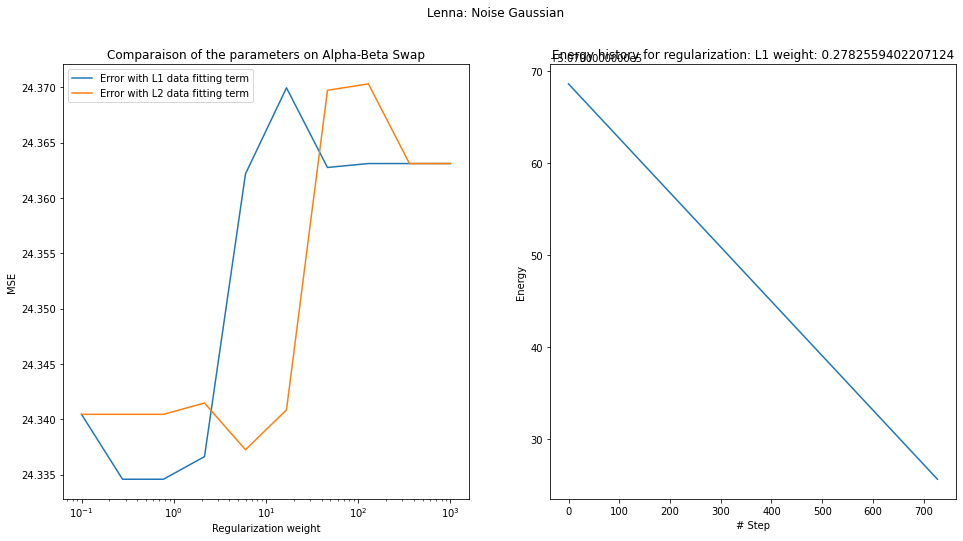

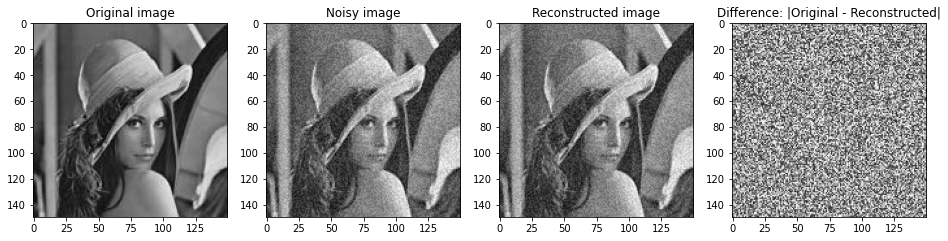

Best error: 24.334577777777778


In [26]:
loader = ImageLoader("lenna.jpg", noise="gaussian", rescale_factor=None)
lenna = np.copy(loader.grayscale())
lenna_gaussian = np.copy(loader.noisy_image())
graph = loader.graph()

Error_result_list_l_g, Best_energy_history_l_g, Best_steps_l_g, best_param_l_g, lenna_gaussian_rec, best_error_l_g = find_best_param(loader.grayscale(), 
                                                                                    graph, 
                                                                                    loader.noisy_image(),
                                                                                    Weight_test_list = np.logspace(-1,3,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
f.suptitle("Lenna: Noise Gaussian")
ax1.plot(*zip(*Error_result_list_l_g["L1"]), label="Error with L1 data fitting term")
ax1.plot(*zip(*Error_result_list_l_g["L2"]), label="Error with L2 data fitting term")
ax1.legend()
ax1.set_xlabel("Regularization weight")
ax1.set_xscale("log")
ax1.set_ylabel("MSE")
ax1.set_title("Comparaison of the parameters on Alpha-Beta Swap")

ax2.plot(Best_steps_l_g, Best_energy_history_l_g)
ax2.set_xlabel("# Step")
ax2.set_ylabel("Energy")
ax2.set_title(f"Energy history for regularization: {best_param_l_g[0]} weight: {best_param_l_g[1]}")
plt.show()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
ax1.imshow(lenna, cmap='gray')
ax1.set_title("Original image")
ax2.imshow(lenna_gaussian, cmap='gray')
ax2.set_title("Noisy image")
ax3.imshow(lenna_gaussian_rec, cmap='gray')
ax3.set_title("Reconstructed image")
ax4.imshow(np.abs(lenna - lenna_gaussian_rec), cmap='gray_r')
ax4.set_title("Difference: |Original - Reconstructed|")
plt.show()
print(f"Best error: {best_error_l_g}")

In [27]:
print(f"Error or the noisy image: {mean_square_error(lenna, lenna_gaussian)}")

Error or the noisy image: 24.340444444444444
